# 1. Systems of Linear Equations  


This section introduces linear systems of equations, also known as systems of linear equations, and discusses how to find their solutions. Linear systems play a central role in linear algebra, as many problems in this field can be simplified and represented as linear systems.



### Linear Systems


A _linear equation_ in $n$ variables, is an equation of the form: 

$$
a_1 x_1 + a_2 x_2 + \dots a_n x_n = b
$$
       
where, $x_1, x_2,\dots x_n$ are variables, and $b$ and the coefficient $a_1, a_2, \dots , a_n$ are real numbers. A _system of linear equations_ is a collection of linear equations in the same set of variables. For example a system of $m$ equations in $n$ variables $x_1, x_2,\dots x_n$, can be represented as: 
 

\begin{align}
   a_{11} x_1 + a_{12} x_2 +& \dots a_{1n} x_n = \,b_1 \\ 
   a_{21} x_1 + a_{22} x_2 +& \dots a_{2n} x_n = \,b_2 \\ 
    &\vdots\\
   a_{n1} x_1 + a_{n2} x_2 +& \dots a_{nn} x_n = \,b_n \\ 
\end{align}




A _solution_ for a linear system is a list of real numbers $(s_1, s_2, \dots, s_n)$ that satisfy each equation in the system. Two linear systems are said to be _equivalent_ if they have the same set of equations. In other words, every solution of the first system is also a solution of the second system, and vice versa. Furthermore, a linear system is called _consistent_ if it has solutions, otherwise it is called _inconsistent_. It turns out that any linear system has either no solutions, exactly one solution, or infinitely many solutions. 

As an example, let's consider a simple case where we have two equations in two unknowns. Finding the solution of such a system is easy as it comes down to finding the intersection of two lines in the plane.More precisely, the graph of each equation in this system represents a line, and a point $(s_1, s_2) \in \mathbb{R}^2$ is a solution if and only if it lies on both lines. 


__Example 1:__ 
The following system is consistent, and its only solution is $(0, -1)$.

\begin{align*}
    2x_1 - x_2 &= 1 \\ 
    x_1 - 2x_2 &= 2 \\ 
\end{align*}

The following cell plots the graph of these lines on the same plane:

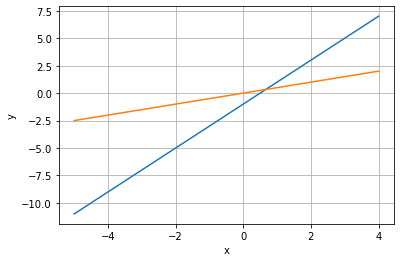

In [1]:
import matplotlib.pyplot as plt

# Define x and y values for the lines
x = range(-5, 5)
y1 = [ 2*k-1 for k in x]
y2 = [ k/2 for k in x]

# Plot the lines on the same plane
plt.plot(x, y1, label= 'equation1')
plt.plot(x, y2, label='equation2')

# Add labels to the graph
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Show the graph
plt.show()



(2) The next system is inconsistent as it does not have any solutions.

\begin{align*}
    2x_1 - x_2 &= 1 \\ 
    4x_1 - 2x_2 &= 7 \\ 
\end{align*}

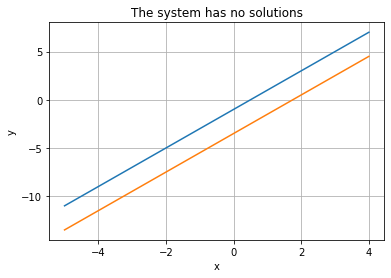

In [2]:
import matplotlib.pyplot as plt

# Define x and y values for the lines
x = range(-5, 5)
y1 = [ 2*k-1 for k in x]
y2 = [ 2*k-7/2 for k in x]

# Plot the lines on the same plane
plt.plot(x, y1, label= r'$2x_1 -x_2 = 1$')
plt.plot(x, y2, label= r'$4x_1 - 2x_2= 7$')

# Add labels to the graph
plt.xlabel('x')
plt.ylabel('y')
plt.title('The system has no solutions')
plt.grid()

# Show the graph
plt.show()

__Exercise__

1. Find a linear system containing two equations in two unknowns that has infinitely many solutions. Verify your answer by plotting the lines of these equations on the same plane.

2. Find a linear system that is equivalent to the linear system in Example 1.

### Solving a Linear System

A fundamental question about a linear system is whether or not it is consistent and, if it is, whether it has a unique solution or infinitely many solutions. This section introduces the _row reduction algorithm_, which enables us to answer these questions for any linear system. The main idea is to use a set of operations called _elementary row operations_ to convert the system into an equivalent system that is easier to solve. These elementary row operations are:

1. Swapping two equations.
2. Multiplying an equation by a nonzero number.
3. Adding a multiple of one equation to another equation.

To do this, we first represent the essential information of the system in a compact rectangular form called the augmented matrix of the system. For example, the augmented matrix of the system:

\begin{align*}
x + 2y + 3z &= 9 \\
2x - y + z &= 8 \\
3x - z &= 3 
\end{align*}

is the following matrix:

\begin{bmatrix} 1 & 2 & 3 & 9 \\ 2 & -1 & 1 & 8 \\ 3 & 0 & -1 & 3 \end{bmatrix}

In the augmented matrix, each row represents an equation in the system. We can apply the same row operations to matrices as we did to equations, simply replacing "equation" with "row" in their definitions. Moreover, we say that two matrices A and B are _row equivalent_ if one can be transformed into the other using the elementary row operations mentioned above.

The goal is to convert the augmented matrix to another augmented matrix in an _echelon form_. This new matrix corresponds to a linear system that is simpler to deal with and is equivalent to the original system.

To define the echelon form, we need the following definitions:

__Zero Row__: A row containing only zero entries.
__Leading Entry__: The leftmost nonzero entry in a nonzero row.

A rectangular matrix is in _row echelon form_ (REF) if:

1. All non-zero rows are above any zero row.
2. Every leading term of a row is in a column to the right of the leading entry.
3. Entries below a leading entry are zero.

A rectangular matrix is in _reduced row echelon form_ (RREF) if:

1. It is in echelon form.
2. Every leading entry is 1.
3. Entries above a leading entry are zero.

__Example 2:__

The following matrix is in REF. The leading entries ($\blacksquare$) can be any nonzero real numbers, while the ($*$s) may be any real number.

\begin{bmatrix} 0 & \blacksquare & * & * & * & & * \\ 0 & 0 & \blacksquare & * & * & & * \\ 0 & 0 & 0 & 0 & \blacksquare & & *\\ 0 & 0 & 0 & 0 & 0 & & 0\end{bmatrix}

The following matrix is in RREF:

\begin{bmatrix} 0 & 1 & 0 & * & 0 & & * \\ 0 & 0 & 1 & * & 0 & & * \\ 0 & 0 & 0 & 0 & 1 & & *\\ 0 & 0 & 0 & 0 & 0 & & 0\end{bmatrix}

__Theorem 1:__
Any nonzero matrix is row equivalent to one and only one matrix in RREF.

Since the reduced echelon form is unique, the leading entries are always in the same positions in any echelon form. These locations are called _pivot positions_, and a column with a pivot position is called a _pivot column_. Note that the leading entries in REF correspond to leading 1s in RREF. In the above example, the squares ($\blacksquare$) identify the pivot positions.



__Reduction Algorithm:__

The reduction algorithm takes in a matrix and produces a matrix in RREF. It consists of 5 steps; in step four, it produces a matrix in REF, and in the fifth step, RREF. We will illustrate the algorithm with an example:

__Example 3:__

Find the RREF of

\begin{bmatrix} 0 & 2 & 3 & & 9\\ 2 & -1 & 1 & & 8 \\ 3 & 0 & -1 & & 3\end{bmatrix}

__Solution:__

Let's denote this matrix by A:

In [7]:
#numpy array to represent a matrix
import numpy as np
A=np.array([[0,2,3,9],[2,-1,1,8],[3,0,-1,3]])

A

array([[ 0,  2,  3,  9],
       [ 2, -1,  1,  8],
       [ 3,  0, -1,  3]])

The following functions perform the row operations:

In [11]:
# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing a row by the sum of itself and a multiple of another 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

__Step 1__: Start with the leftmost nonzero entry in the first column and bring it to the top row. This is a pivot column, and the pivot position should be on top.

In [12]:
#the leftmost nonzero column:
A[:,0]

array([0, 2, 3])

__Step 2__: Select a nonzero entry in the pivot column as a pivot. If necessary swap the rows to move this entrty to the top. 

In [14]:
#The first nonzero element is at row 2. Swap the rows 1 and 2:
A_1 = swap(A, 0, 1)
A_1

array([[ 2., -1.,  1.,  8.],
       [ 0.,  2.,  3.,  9.],
       [ 3.,  0., -1.,  3.]])

__Step 3__: Use scaling operation to make the pivot 1, and replacement operation to create zeros below the leading 1:

In [17]:
#Divide row1 by 2 
A_2 = scale(A_1, 0, 1/2)
A_2

array([[ 1. , -0.5,  0.5,  4. ],
       [ 0. ,  2. ,  3. ,  9. ],
       [ 3. ,  0. , -1. ,  3. ]])

In [19]:
#Replace row3  by row3-3*row1

A_3 = replace(A_2,2,0,-3)
A_3

array([[ 1. , -0.5,  0.5,  4. ],
       [ 0. ,  2. ,  3. ,  9. ],
       [ 0. ,  1.5, -2.5, -9. ]])

__Step 4:__ Ignore the row with a pivot position and cover all rows, if any, above it. For the remaining matrix, apply steps 1-3. Repeat the process until there are no more non-zero rows to modify.

In [21]:
#Divide row2 by 2 
A_4 = scale(A_3, 1, 1/2)
A_4

array([[ 1. , -0.5,  0.5,  4. ],
       [ 0. ,  1. ,  1.5,  4.5],
       [ 0. ,  1.5, -2.5, -9. ]])

In [23]:
#Replace row3  by row3-3*row1

A_5 = replace(A_4, 2, 1, -1.5)
A_5

array([[  1.  ,  -0.5 ,   0.5 ,   4.  ],
       [  0.  ,   1.  ,   1.5 ,   4.5 ],
       [  0.  ,   0.  ,  -4.75, -15.75]])

We apply the fifth step to get the RREF:

__Step 5__: If a pivot is not one, we use the scaling operation to make it one. Moreover, we create zeros above each pivot starting with the rightmost pivot and working upward and to the left.


In [27]:
#make all entries in pivot positions 1
A_6 = scale(A_5,2, 1/-4.75)
A_6

array([[ 1.        , -0.5       ,  0.5       ,  4.        ],
       [ 0.        ,  1.        ,  1.5       ,  4.5       ],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

In [28]:
#replace row1 by row1 + 0.5* row 2
A_7 = replace(A_6, 0, 1, 0.5)
A_7

array([[ 1.        ,  0.        ,  1.25      ,  6.25      ],
       [ 0.        ,  1.        ,  1.5       ,  4.5       ],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

In [29]:
#replace row1 by row1 - 1.25* row 2
A_8 = replace(A_7, 0, 2, -1.25)
A_8

array([[ 1.        ,  0.        ,  0.        ,  2.10526316],
       [ 0.        ,  1.        ,  1.5       ,  4.5       ],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

In [30]:
#replace row2 by row2 - 1.5* row 3
A_9 = replace(A_8,1,2,-1.5)
A_9

array([[ 1.        ,  0.        ,  0.        ,  2.10526316],
       [ 0.        ,  1.        ,  0.        , -0.47368421],
       [-0.        , -0.        ,  1.        ,  3.31578947]])

$A$_9 is the RREF of $A$.

__Example 2__

Find the solution set of the following system of equations:

\begin{align*}
2x -5y +z &= 2 \\
x -y &= 4 \\
3x-z &= 3 
\end{align*} 

__Solution__: First, we will find the augmented matrix of the system and then convert it to its RREF:



In [31]:
#The augmented matrix
R = np.array([[2,-5, 1, 2], [1,-1,0,4], [3,0,-1,3]])
R

array([[ 2, -5,  1,  2],
       [ 1, -1,  0,  4],
       [ 3,  0, -1,  3]])

In [32]:
#finding the first pivot entry: 1
R1= swap(R, 1, 0)
R1

array([[ 1., -1.,  0.,  4.],
       [ 2., -5.,  1.,  2.],
       [ 3.,  0., -1.,  3.]])

In [33]:
#making entries below 1 zero
R2 = replace(R1, 1, 0, -2)
R3 = replace(R2, 2,0, -3)
R3

array([[ 1., -1.,  0.,  4.],
       [ 0., -3.,  1., -6.],
       [ 0.,  3., -1., -9.]])

In [34]:
#making entries below the second pivot entry (-3) zero
R4 = replace(R3, 2, 1, 1)
R4

array([[  1.,  -1.,   0.,   4.],
       [  0.,  -3.,   1.,  -6.],
       [  0.,   0.,   0., -15.]])

R4 is in REF. Let's write back the corresponding linear system:

\begin{align*}
x + y &= 4 \\
-3y + z &= -6 \\
0 &= -15 
\end{align*} 

The last equation is impossible, which means the system is inconsistent.

__Exercise__


1. Determine which of the following matrices are in REF. For those that are, identify their pivot columns. Are any in RREF?


$A=\begin{bmatrix} 0 & 0 & 4 &-1 && 0\\ 0 & 0 & 0 &0 && 0 \\ 0 & 0& 0 & 0 &&3\end{bmatrix}$


$B=\begin{bmatrix} 1 & 1 & 0 && 1\\  0 & 1 & 1 &&0\\ 0 & 0 & 1 &&1 \end{bmatrix}$

$C=\begin{bmatrix} 1 & 0 & 3 && 0\\  0 & 1 & 0 &&0\\ 0 & 0 & 0 &&1 \end{bmatrix}$


2. For the above matrices write the coresponding linear systems and find their solutions.  